In [1]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from google.colab import drive

In [2]:
# 1. Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_images_from_folder(folder, size=(128, 128), limit=2000):
    images = []
    filenames = []
    for i, filename in enumerate(tqdm(os.listdir(folder), desc="Loading images")):
        if i >= limit:  # Stop after reaching the specified limit
            break
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('RGB')  # Ensure the image is in RGB format
            img = img.resize(size, Image.Resampling.LANCZOS)  # Resize the image
            img_array = np.array(img) / 255.0  # Normalize to [0, 1]
            images.append(img_array)
            filenames.append(filename)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return np.array(images), filenames

In [4]:
# Load and preprocess images
image_folder_path = '/content/drive/MyDrive/dataset/sample image1'
encrypted_image_folder = '/content/drive/MyDrive/dataset/encrypted image'
decrypted_image_folder = '/content/drive/MyDrive/dataset/decrypted image'

In [5]:
# Load original and encrypted images
original_images, original_filenames = load_images_from_folder(image_folder_path, size=(128, 128), limit=500)
encrypted_images, encrypted_filenames = load_images_from_folder(encrypted_image_folder, size=(128, 128), limit=500)
decrypted_images, decrypted_filenames = load_images_from_folder(decrypted_image_folder, size=(128, 128), limit=500)


Loading images:  25%|██▌       | 500/2000 [00:44<02:12, 11.30it/s] 


In [6]:
# One-to-one mapping between original, encrypted, and decrypted images
image_mapping = {}
for i in range(len(original_filenames)):
    image_mapping[original_filenames[i]] = {
        'encrypted': encrypted_filenames[i],
        'decrypted': decrypted_filenames[i]
    }

In [7]:
# Displaying the mapping for verification
for original, mapping in list(image_mapping.items())[:500]:
    print(f"Original: {original} -> Encrypted: {mapping['encrypted']} -> Decrypted: {mapping['decrypted']}")

Original: resized_image_1001.bmp -> Encrypted: encrypted_image_1001.bmp -> Decrypted: decrypted_image_1001.bmp
Original: resized_image_1002.bmp -> Encrypted: encrypted_image_1002.bmp -> Decrypted: decrypted_image_1002.bmp
Original: resized_image_1003.bmp -> Encrypted: encrypted_image_1003.bmp -> Decrypted: decrypted_image_1003.bmp
Original: resized_image_1004.bmp -> Encrypted: encrypted_image_1004.bmp -> Decrypted: decrypted_image_1004.bmp
Original: resized_image_1005.bmp -> Encrypted: encrypted_image_1005.bmp -> Decrypted: decrypted_image_1005.bmp
Original: resized_image_1006.bmp -> Encrypted: encrypted_image_1006.bmp -> Decrypted: decrypted_image_1006.bmp
Original: resized_image_1007.bmp -> Encrypted: encrypted_image_1007.bmp -> Decrypted: decrypted_image_1007.bmp
Original: resized_image_1008.bmp -> Encrypted: encrypted_image_1008.bmp -> Decrypted: decrypted_image_1008.bmp
Original: resized_image_1009.bmp -> Encrypted: encrypted_image_1009.bmp -> Decrypted: decrypted_image_1009.bmp
O

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import losses

# Define the CNN architecture
def create_cnn(input_shape):
    model = models.Sequential([
        layers.Conv2D(8, (3, 3),strides=1, padding="same", activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (3, 3),strides=1, padding="same", activation='relu'),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), strides=1, padding="same", activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(3, activation='softmax')  # Three classes (original, encrypted, decrypted)
    ])
    return model

# Model setup
input_shape = (128, 128, 3)
cnn_model = create_cnn(input_shape)

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,579 (2.02 MB)

 Trainable params: 530,579 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Preparing labels for the three categories: original, encrypted, decrypted
def prepare_data(original_images, encrypted_images, decrypted_images):
    X = np.concatenate([original_images, encrypted_images, decrypted_images], axis=0)
    y = np.concatenate([
        np.zeros(len(original_images)),  # Label 0 for original images
        np.ones(len(encrypted_images)),  # Label 1 for encrypted images
        np.full(len(decrypted_images), 2)  # Label 2 for decrypted images
    ])
    y = tf.keras.utils.to_categorical(y, num_classes=3)  # One-hot encoding
    return X, y

In [24]:
# Prepare training data
X_train, y_train = prepare_data(original_images, encrypted_images, decrypted_images)


In [25]:
# Train the model
history = cnn_model.fit(X_train, y_train, epochs=150, batch_size=128, validation_split=0.2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4653 - loss: 1.0145 - val_accuracy: 0.0000e+00 - val_loss: 1.3124
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8300 - loss: 0.4782 - val_accuracy: 0.0000e+00 - val_loss: 1.6490
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8237 - loss: 0.4149 - val_accuracy: 0.0000e+00 - val_loss: 1.4344
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8267 - loss: 0.3727 - val_accuracy: 0.0000e+00 - val_loss: 1.1420
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8270 - loss: 0.3681 - val_accuracy: 0.0000e+00 - val_loss: 1.1499
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8219 - loss: 0.3585 - val_accuracy: 0.0000e+00 - val_loss: 1.2298
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8217 - loss: 0.3727 - val_accuracy: 0.0000e+00 - val_loss: 1.1583
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8382 - loss: 0.353

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import random

def predict_and_display(model, original_images, encrypted_images, decrypted_images, image_mapping):
    random_indices = random.sample(range(len(original_images)), 20)  # Randomly select 20 indices

    for i in random_indices:
        original_image = original_images[i]
        encrypted_image = encrypted_images[i]
        decrypted_image = decrypted_images[i]

        # Reshape the original image for prediction
        reshaped_original = original_image.reshape(1, 128, 128, 3)

        # Predict the class (assuming softmax output with 3 classes)
        pred = np.argmax(model.predict(reshaped_original), axis=1)
        pred_class = 'Original' if pred == 0 else 'Encrypted' if pred == 1 else 'Decrypted'

        print(f"Prediction: {pred_class}")

        # Display original, encrypted, and decrypted images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(original_image)
        plt.title('Original')

        plt.subplot(1, 3, 2)
        plt.imshow(encrypted_image)
        plt.title('Encrypted')

        plt.subplot(1, 3, 3)
        plt.imshow(decrypted_image)
        plt.title('Decrypted')

        plt.show()

# Call the function to display 20 random predictions
predict_and_display(cnn_model, original_images, encrypted_images, decrypted_images, image_mapping)


Output hidden; open in https://colab.research.google.com to view.

In [28]:
# Save the trained model
model_save_path = '/content/drive/MyDrive/dataset/cnn_model.h5'  # Define the save path
cnn_model.save(model_save_path)
print(f"Model saved at {model_save_path}")


Model saved at /content/drive/MyDrive/dataset/cnn_model.h5


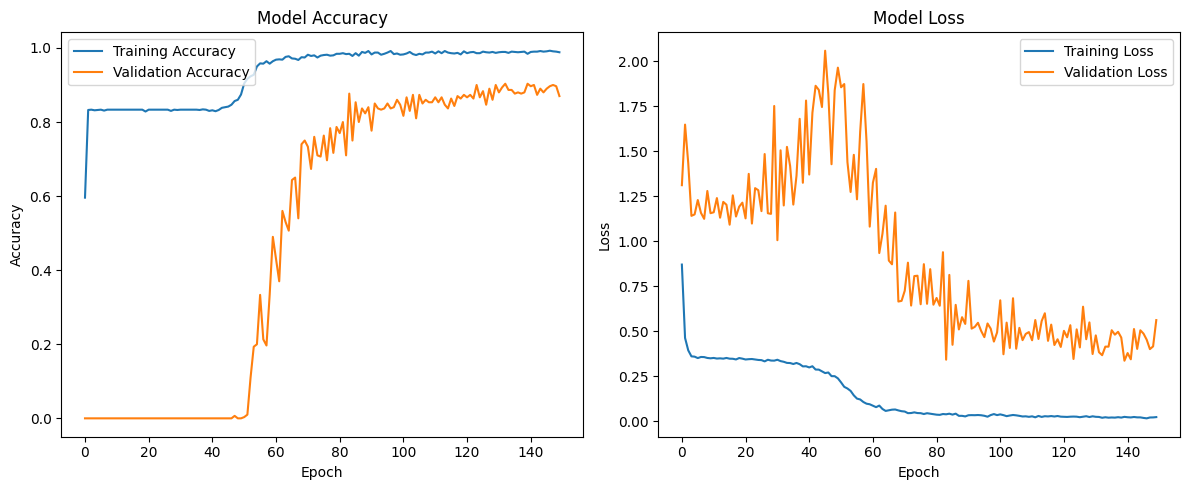

In [29]:
# Assuming history is the output of model.fit()
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


In [30]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming original_images correspond to label 0, encrypted_images to label 1, and decrypted_images to label 2
y_true = np.array([0]*len(original_images) + [1]*len(encrypted_images) + [2]*len(decrypted_images))

# Combine images for prediction
all_images = np.concatenate((original_images, encrypted_images, decrypted_images))

# Step 2: Predict on the combined images
y_pred = np.argmax(cnn_model.predict(all_images), axis=1)

# Step 3: Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Step 4: Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step
Accuracy: 0.9667
Precision: 0.9690
Recall: 0.9667
F1 Score: 0.9666
